In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/HondaToyotadf.csv")

### Word count and length

In [3]:
#Getting the number of words in the selftext and title
df["wordcount"] = df["combined"].apply(lambda x: len(x.split(" ")))

In [4]:
df["wordcount"].describe()

count    4138.000000
mean       86.852344
std        77.454266
min         2.000000
25%        42.000000
50%        67.000000
75%       106.000000
max      1303.000000
Name: wordcount, dtype: float64

The minimum number of words in the combined selftext and title is 2 which we will go into more details later

In [5]:
df[df["wordcount"] < 5][["combined","isHonda"]]

,combined,isHonda
689,WoW! RedBull NSX,1
714,WoW!!! RedBull NSX,1
1659,Anyone try this?,1
2248,&amp;#x200B;\n\n My First Toyota,0
2337,Test Test,0
2913,[removed]\n\n[View Poll]( ?,0


As seen above, those word counts with less than 5 seems like they do not aid to the training of the models except for entries 689, 714 abd 2248. NSX is a car model of Honda and hence will not be excluded from the data. We would clean the entries **2337** and **2913**

Text(3.674999999999997, 0.5, 'Count of Subreddit Posts')

<Figure size 1080x576 with 0 Axes>

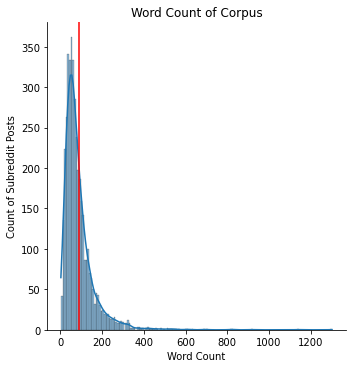

In [6]:
plt.figure(figsize=(15,8))
sns.displot(df["wordcount"],kde = True)
plt.axvline(x=df.wordcount.mean(),
            color='red')
plt.title("Word Count of Corpus")
plt.xlabel("Word Count")
plt.ylabel("Count of Subreddit Posts")

In [7]:
df["wordcount"].skew()

4.224354343133635

The word count distribution is skewd to the left side with a skewness of 4.224, which is greatly above 1. We'll take a look at those post with more than the mean count of words

In [8]:
len(df[df["wordcount"] > 86])

1456

#### Exploring the word count for individual subreddit word count

Text(8.228611111111107, 0.5, 'Post count')

<Figure size 1152x720 with 0 Axes>

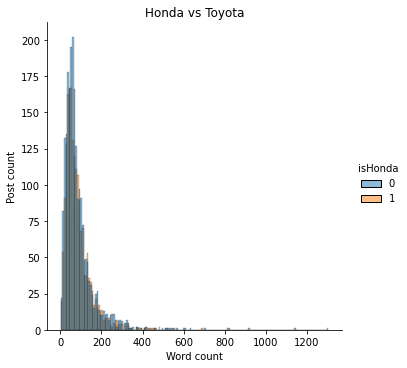

In [22]:
plt.figure(figsize = (16,10))
sns.displot(df, x= "wordcount", hue = "isHonda")
plt.title("Honda vs Toyota")
plt.xlabel("Word count")
plt.ylabel("Post count")

In [25]:
df.groupby(by = "isHonda").sum()["wordcount"]

isHonda
0    195428
1    163967
Name: wordcount, dtype: int64

It seems like for posts in both subreddits have similar word count. The total word count for each subreddit is almost the same and therefore prevent us from being skew to a single subreddit.

#### Checking for frequency of posts in the subredditsb

Text(3.674999999999997, 0.5, 'Post Counts')

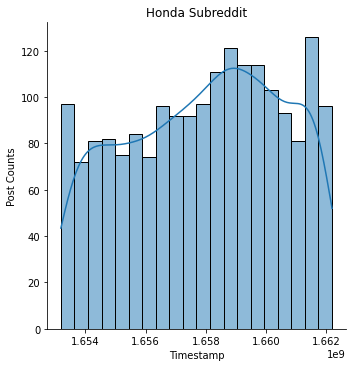

In [40]:
sns.displot(df[df["isHonda"] == 1]["created_utc"],kde = True, bins = 20)
plt.title("Honda Subreddit")
plt.xlabel("Timestamp")
plt.ylabel("Post Counts")

Text(3.674999999999997, 0.5, 'Post Counts')

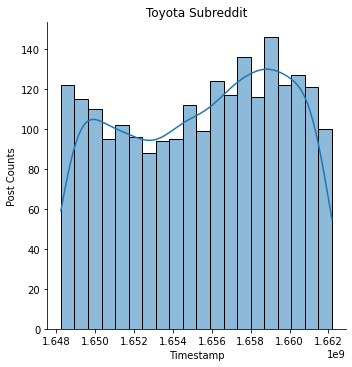

In [41]:
sns.displot(df[df["isHonda"] == 0]["created_utc"],kde = True, bins = 20)
plt.title("Toyota Subreddit")
plt.xlabel("Timestamp")
plt.ylabel("Post Counts")

The frequency of the posts in both of the subreddit looks pretty healthy, averaging 

#### Word cloud visulisatino of word corpus

In [11]:
cvec = CountVectorizer(stop_words = "english", ngram_range = (1,1))
wordvec = cvec.fit_transform(df.combined)
vecdf = pd.DataFrame(wordvec.toarray(), columns=cvec.get_feature_names())

In [30]:
#pip install wordcloud
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word cloud of corpus')

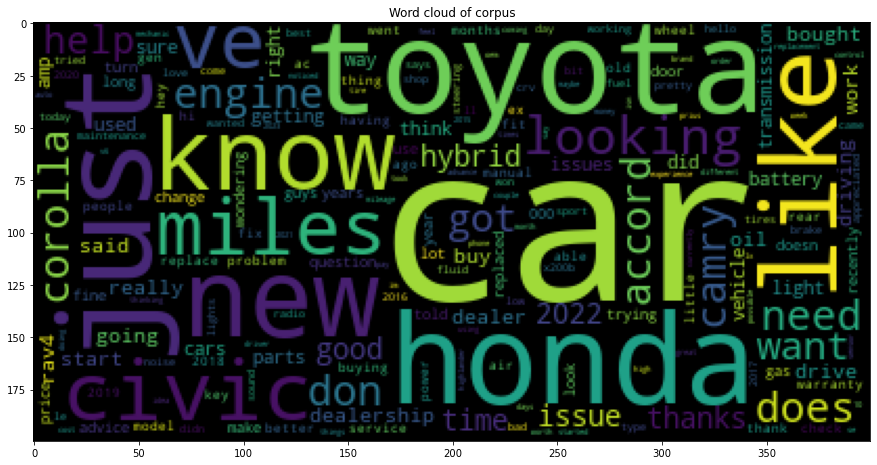

In [28]:
wordcloud = WordCloud().generate_from_frequencies(vecdf.sum())
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Word cloud of corpus")

### N-gram exploration

#### 2 ngram range

In [14]:
cvec2n = CountVectorizer(stop_words = "english", ngram_range = (2,2))

In [15]:
wordvec2n = cvec2n.fit_transform(df.combined)

<AxesSubplot:>

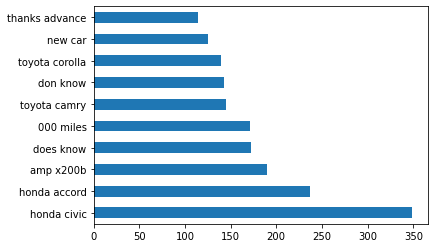

In [16]:
vec2ndf = pd.DataFrame(wordvec2n.toarray(), columns=cvec2n.get_feature_names())
vec2ndf.sum().sort_values(ascending= False).head(10).plot(kind = "barh")

#### 3 ngram range

In [17]:
cvec3n = CountVectorizer(stop_words = "english", ngram_range = (3,3))

In [18]:
wordvec3n = cvec3n.fit_transform(df.combined)

<AxesSubplot:>

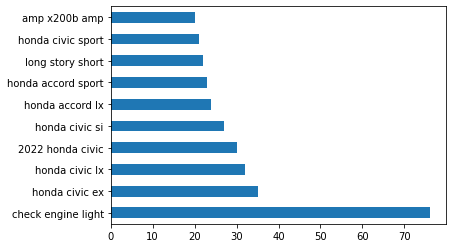

In [19]:
vec3ndf = pd.DataFrame(wordvec3n.toarray(), columns=cvec3n.get_feature_names())
vec3ndf.sum().sort_values(ascending= False).head(10).plot(kind = "barh")

#### Findings for n gram
1. Viewing the top 10 highest count of 2 ngram and 3 ngram words, it seems like they mostly include the car brand, eg. honda or toyota, which is to be expected since the subreddit is about the two brands. 
2. They ngrams also included the models of the car, for example, honda civic si which is a compact sports car. And Toyota sedan called camry.

### EDA summary

The ngram words look healthy in terms of the different terms that the subreddit posts have. The text in the post and the title would serve the purpose of identifying which subreddits they belong to. The dataset at hand would be able to train our models to classifying the subreddit posts, as well as tackling our problem statement.